In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
train_path = 'E:/ML Internship/car/train'
test_path = 'E:/ML Internship/car/test'
val_path = 'E:/ML Internship/car/val'

In [3]:
#The code essentially defines two functions: preprocess_images, which reads, resizes, and 
#normalizes images, and preprocess_dataset, which processes images and assigns labels
#based on class indices. This set of functions can be used to preprocess the images and 
#
def preprocess_images(image_paths, target_size=(224, 224)):
    processed_images = []
    for path in image_paths:
        image = cv2.imread(path)
        resized_image = cv2.resize(image, target_size)
        normalized_image = resized_image / 255.0
        processed_images.append(normalized_image)
    return processed_images

def preprocess_dataset(dataset_path):
    classes = os.listdir(dataset_path)
    images = []
    labels = []
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        class_images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        images.extend(class_images)
        labels.extend([i] * len(class_images))  # Assign label based on class index
    return preprocess_images(images), labels

# Preprocess train, test, and val datasets
X_train, y_train = preprocess_dataset(train_path)
print("completed ")
X_test, y_test = preprocess_dataset(test_path)
print("completed ")
X_val, y_val = preprocess_dataset(val_path)
print("completed ")

completed 
completed 
completed 


In [4]:
#Organize the preprocessed data into NumPy arrays
X_train = np.array(X_train)
print("completed")
y_train = np.array(y_train)
print("completed")
X_test = np.array(X_test)
print("completed")
y_test = np.array(y_test)
print("completed")
X_val = np.array(X_val)
print("completed")
y_val = np.array(y_val)
print("completed")


completed
completed
completed
completed
completed
completed


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
num_classes=8
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # num_classes is the number of car colors

In [ ]:
#DataAugmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)


In [ ]:
batch_size = 16
epochs = 15

# Define an optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the defined optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    
    # Train the model for 1 epoch using the full training dataset
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=1, validation_data=(X_val, y_val))
    
    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Save the model after each epoch
    model.save(f'car_model_epoch{epoch+1:02d}.h5')
    
    print("Model saved\n")


Epoch 1/15
29/29 [==============================] - 13s 429ms/step - loss: 0.6970 - accuracy: 0.7549
Test Loss: 0.6970
Test Accuracy: 0.7549
Model saved

Epoch 2/15
29/29 [==============================] - 15s 499ms/step - loss: 0.3121 - accuracy: 0.9071
Test Loss: 0.3121
Test Accuracy: 0.9071
Model saved

Epoch 3/15


In [6]:
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
loaded_model = tf.keras.models.load_model('car_model_epoch02.h5')

# Preprocess a new image
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, target_size)
    normalized_image = resized_image / 255.0
    return np.expand_dims(normalized_image, axis=0)  # Add batch dimension

# Path to the new image you want to predict
new_image_path = 'C:/Users/92309/Downloads/output_faces/red.jpg'

# Preprocess the new image
preprocessed_image = preprocess_image(new_image_path)

# Make a prediction
predictions = loaded_model.predict(preprocessed_image)

# Interpret the prediction
predicted_class = np.argmax(predictions)

# Define a dictionary to map predicted classes to car colors
car_color_map = {
    0: "Black",
    1: "Blue",
    2: "Brown",
    3: "Green",
    4: "Grey",
    5: "Red",
    6: "White",
    7: "Yellow"
}

# Display the predicted class and the probability distribution
print(f"Predicted Class: {predicted_class}")
predicted_color = car_color_map.get(predicted_class, "Unknown")
print(f"Car Color is {predicted_color}")
print("Probability Distribution:", predictions)


1/1 [==============================] - 0s 129ms/step
Predicted Class: 5
Car Color is Red
Probability Distribution: [[9.4057471e-16 7.0611201e-25 7.8597580e-08 3.8729978e-11 4.1009010e-12
  9.9999988e-01 4.3437018e-15 7.9405149e-10]]


In [30]:
images = []
labels = []
def preprocess_images(image_paths, target_size=(224, 224)):
    processed_images = []
    for path in image_paths:
        image = cv2.imread(path)
        resized_image = cv2.resize(image, target_size)
        normalized_image = resized_image / 255.0
        processed_images.append(normalized_image)
    return processed_images

def preprocess_dataset(dataset_path):
    classes = os.listdir(dataset_path)
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        class_images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        images.extend(class_images)
        labels.extend([i] * len(class_images))  # Assign label based on class index

    preprocessed_images = preprocess_images(images)
    return preprocessed_images, labels

# Provide the path to your dataset
dataset_path = r'E:\ML Internship\car\confusionmatrixdata'

# Preprocess the dataset
preprocessed_images, labels = preprocess_dataset(dataset_path)

# Print the number of preprocessed images and labels
print(f"Number of preprocessed images: {len(preprocessed_images)}")
print(f"Number of labels: {len(labels)}")
print(preprocessed_images)
print(labels)

Number of preprocessed images: 50
Number of labels: 50
[array([[[0.14901961, 0.25882353, 0.41960784],
        [0.17254902, 0.28627451, 0.43529412],
        [0.22745098, 0.34509804, 0.48627451],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.12941176, 0.23529412, 0.39215686],
        [0.14901961, 0.25882353, 0.40784314],
        [0.21176471, 0.3254902 , 0.4627451 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.12941176, 0.22745098, 0.38431373],
        [0.12941176, 0.23137255, 0.37647059],
        [0.19215686, 0.29803922, 0.43137255],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.42352941, 0.50980392, 0.62352941],
        [0.4

2/2 [==============================] - 1s 282ms/step


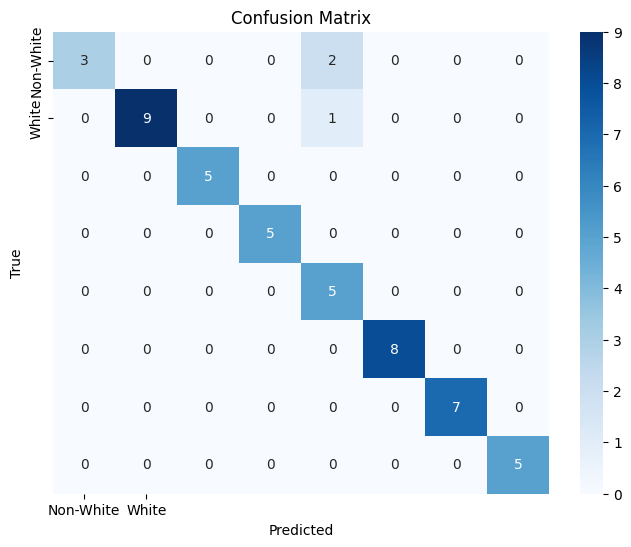

True Positives: 9
True Negatives: 3
False Positives: 0
False Negatives: 0
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Load the trained model
loaded_model = tf.keras.models.load_model('car_model_epoch02.h5')

# Load labels for true positive white car predictions
true_labels = labels

# Get predicted labels for the preprocessed images
preprocessed_images = np.array(preprocessed_images)  # Convert to numpy array
predictions = loaded_model.predict(preprocessed_images)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Extract confusion matrix values
tn = confusion_mtx[0, 0]
fp = confusion_mtx[0, 1]
fn = confusion_mtx[1, 0]
tp = confusion_mtx[1, 1]

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Define class labels
class_labels = ["Non-White", "White"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print metrics
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
